In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## *Data Checks to perform*

In [17]:
def df_info(df):
    print(f"Data Shape: {df.shape}")
    df_info = pd.DataFrame(df.dtypes, columns=['dtype'])
    df_info = df_info.reset_index()
    df_info['Name'] = df_info['index']
    df_info = df_info[['Name', 'dtype']]
    df_info['Missing Values'] = df.isnull().sum().values
    df_info['% Missing'] = ((df.isnull().sum().values / len(df)) * 100).round(2)
    df_info['Unique Values'] = df.nunique().values
    df_info['First Value'] = df.loc[0].values
    return df_info

In [18]:
df_info(df)

Data Shape: (1000, 8)


,Name,dtype,Missing Values,% Missing,Unique Values,First Value
0,gender,object,0,0.0,2,female
1,race_ethnicity,object,0,0.0,5,group B
2,parental_level_of_education,object,0,0.0,6,bachelor's degree
3,lunch,object,0,0.0,2,standard
4,test_preparation_course,object,0,0.0,2,none
5,math_score,int64,0,0.0,81,72
6,reading_score,int64,0,0.0,72,72
7,writing_score,int64,0,0.0,77,74


In [22]:
numerical = df.select_dtypes(include=[np.number])
numerical.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
category = df.select_dtypes(include=[object])
category.describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


## *Dataset information*

<Axes: ylabel='count'>

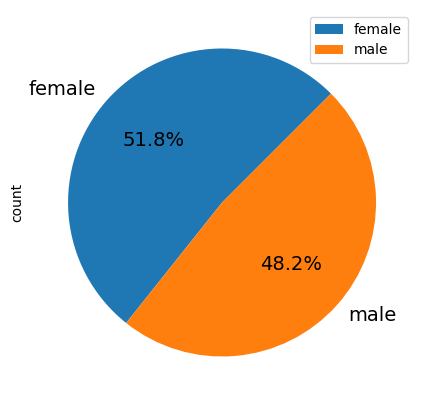

In [30]:
# gender : sex of students
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=45, shadow=False, legend=True, fontsize=14, figsize=(10, 5))

<Axes: xlabel='race_ethnicity'>

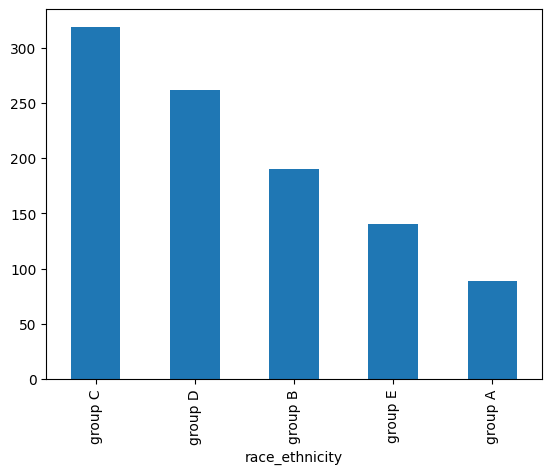

In [31]:
# race/ethnicity : ethnicity of students
df['race_ethnicity'].value_counts().plot(kind='bar')

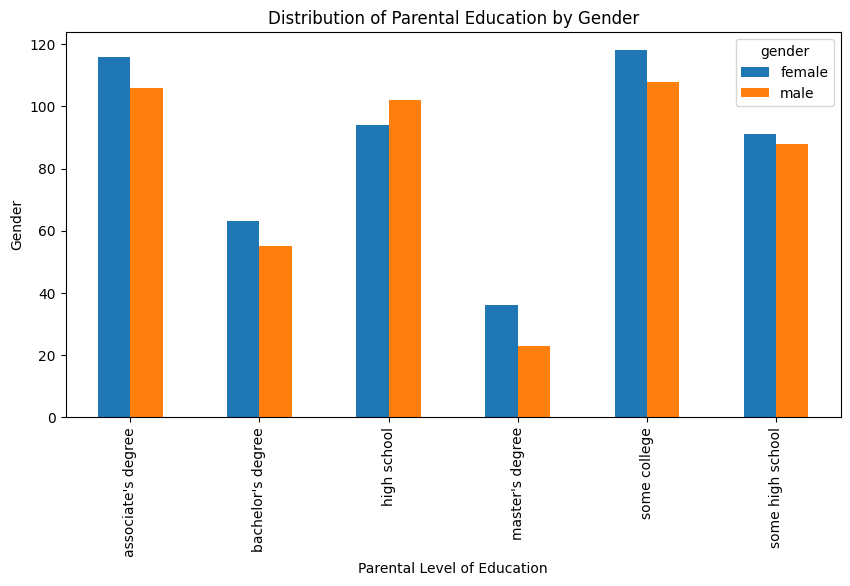

In [38]:
# distribution of parental education levels by gender
edu_group = df.groupby('parental_level_of_education')['gender'].value_counts().unstack()
edu_group.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Parental Level of Education')
plt.ylabel('Gender')
plt.title('Distribution of Parental Education by Gender')
plt.show()

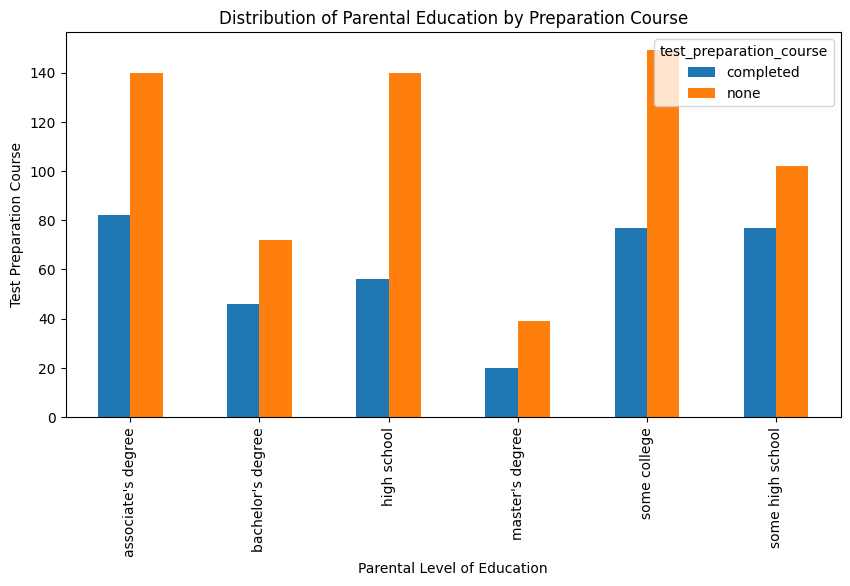

In [ ]:
prep_edu = df.groupby('parental_level_of_education')['test_preparation_course'].value_counts().unstack()
prep_edu.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Parental Level of Education')
plt.ylabel('Test Preparation Course')
plt.title('Distribution of Parental Education by Preparation Course')
plt.show()

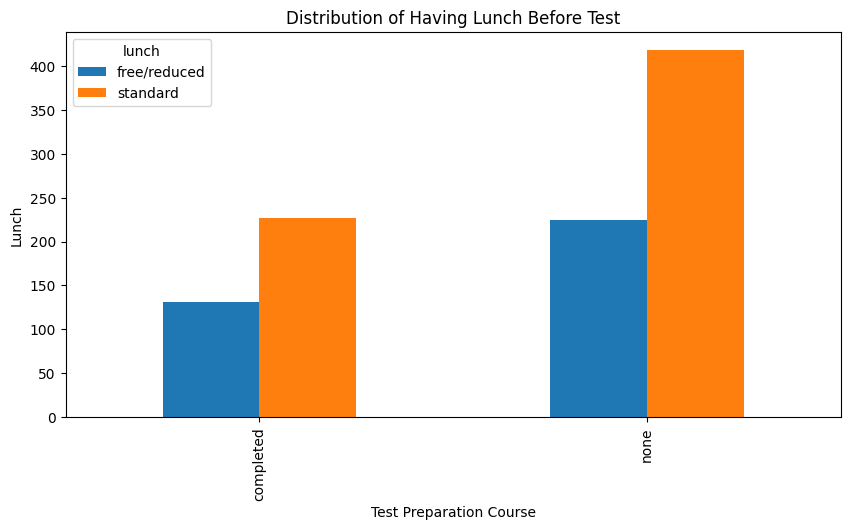

In [42]:
prep_edu = df.groupby('test_preparation_course')['lunch'].value_counts().unstack()
prep_edu.plot(kind='bar', figsize=(10, 5))
plt.ylabel('Lunch')
plt.xlabel('Test Preparation Course')
plt.title('Distribution of Having Lunch Before Test')
plt.show()

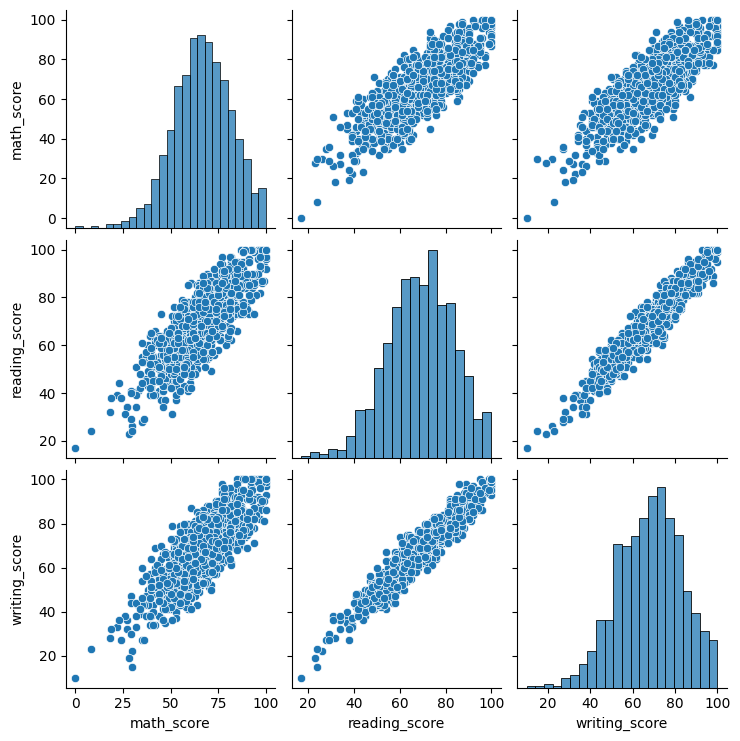

In [40]:
sns.pairplot(numerical)

In [47]:
# Unique Values in Categorical Columns
for cat in category:
    unique_values = df[cat].unique()
    print(f"\nUnique values in '{cat}':\n{unique_values}\n{'='*50}")


Unique values in 'gender':
['female' 'male']

Unique values in 'race_ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in 'parental_level_of_education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in 'lunch':
['standard' 'free/reduced']

Unique values in 'test_preparation_course':
['none' 'completed']


In [48]:
# Adding columns for "Total Score" and "Average"
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = (df['total_score'] / 3).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


<Axes: >

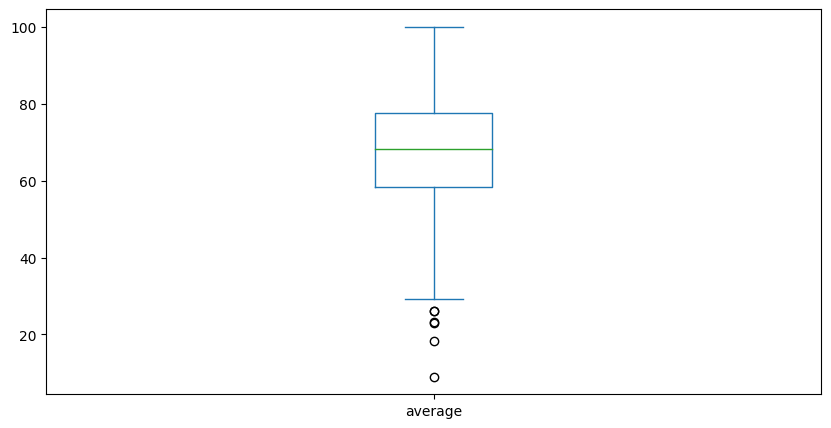

In [54]:
df['average'].sort_values().plot(kind='box', figsize=(10, 5))

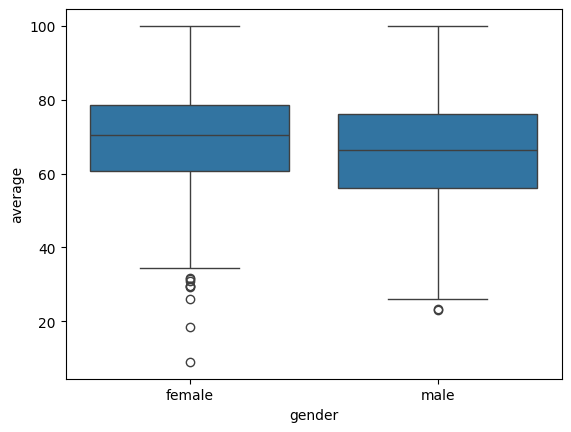

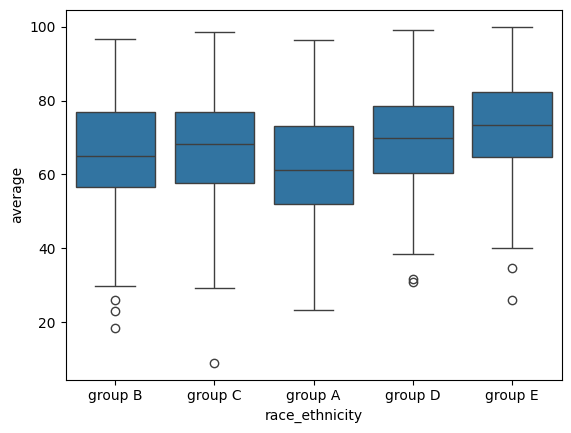

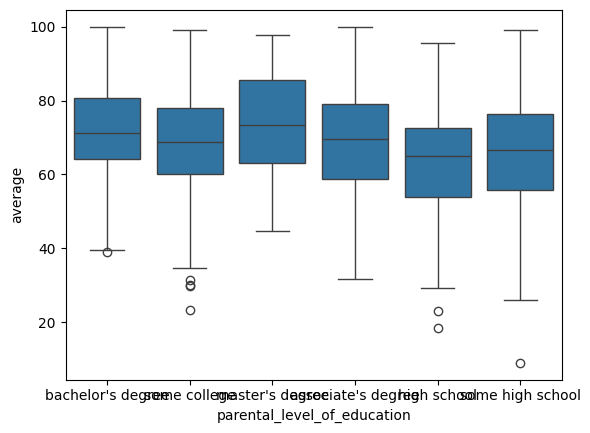

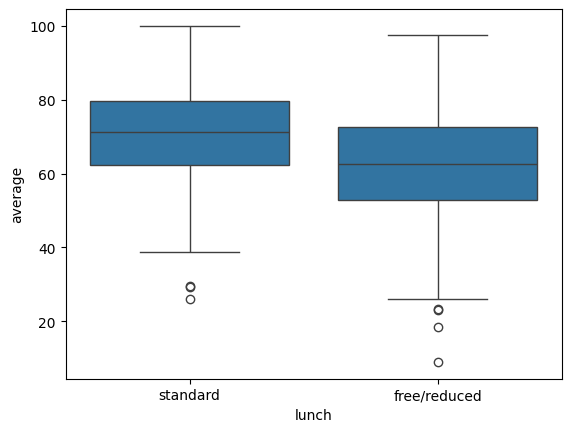

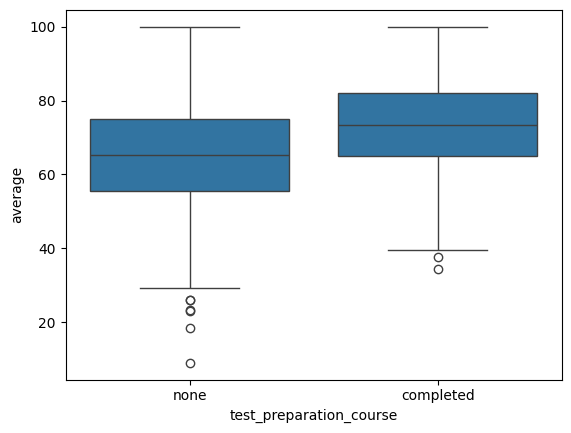

In [60]:
for cat in category:
    sns.boxplot(x=cat, y='average', data=df)
    plt.show()

In [61]:
# Top ranking students
for subject in numerical:
    count_full = df[df[subject] == 100]['average'].count()
    print(f"Number of students with full score in {subject}: {count_full}")

Number of students with full score in math_score: 7
Number of students with full score in reading_score: 17
Number of students with full score in writing_score: 14


In [62]:
# Buttom ranking students
for subject in numerical:
    count_full = df[df[subject] <= 20]['average'].count()
    print(f"Number of students with buttom score in {subject}: {count_full}")

Number of students with buttom score in math_score: 4
Number of students with buttom score in reading_score: 1
Number of students with buttom score in writing_score: 3


Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

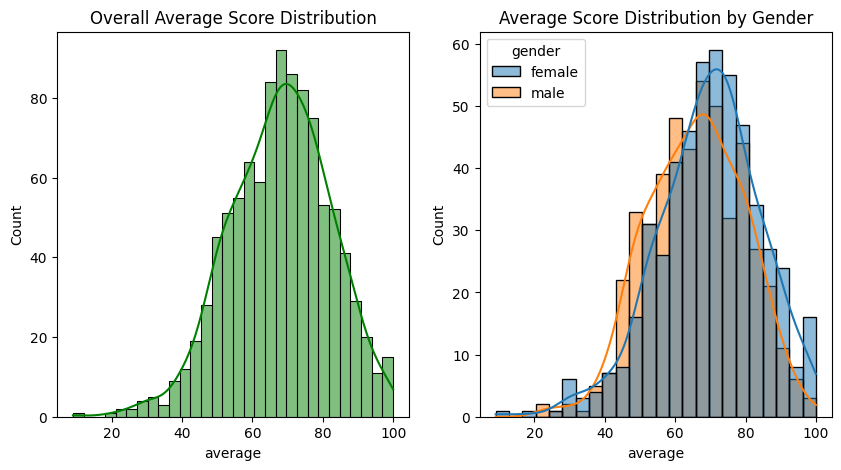

In [69]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.title('Overall Average Score Distribution')

plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.title('Average Score Distribution by Gender')

plt.show()

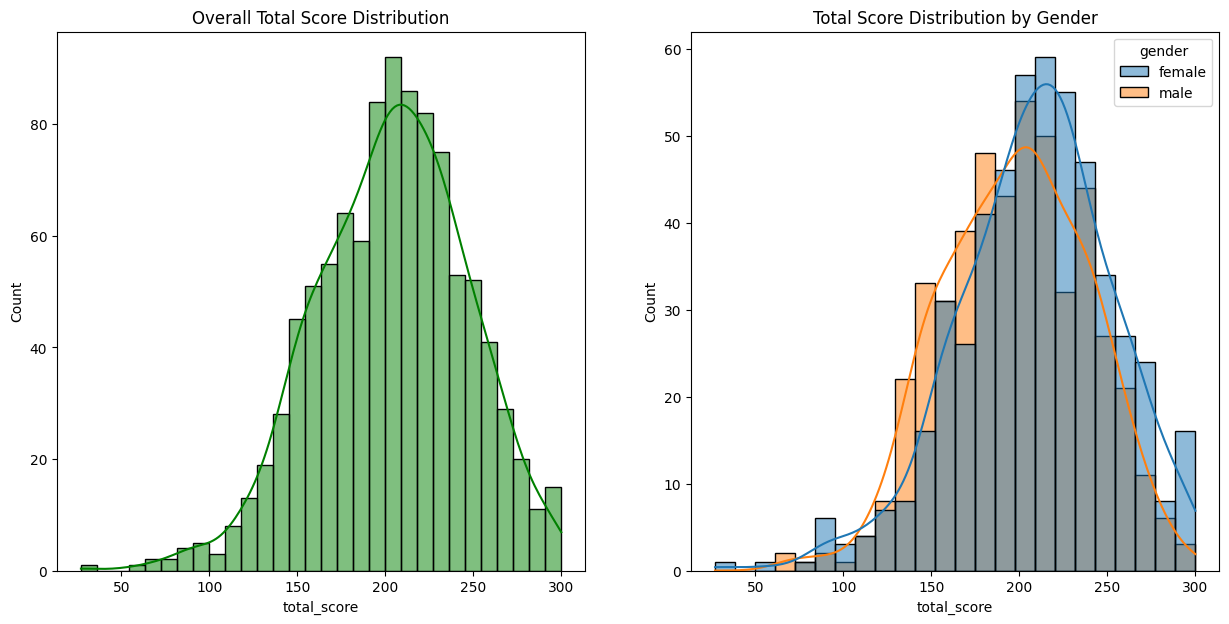

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.title('Overall Total Score Distribution')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.title('Total Score Distribution by Gender')
plt.show()